In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

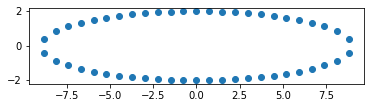

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
#assigning x nad y values
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
def line(intercept, slope, x):
  y = (slope*x) + intercept
  plt.plot(x, y)

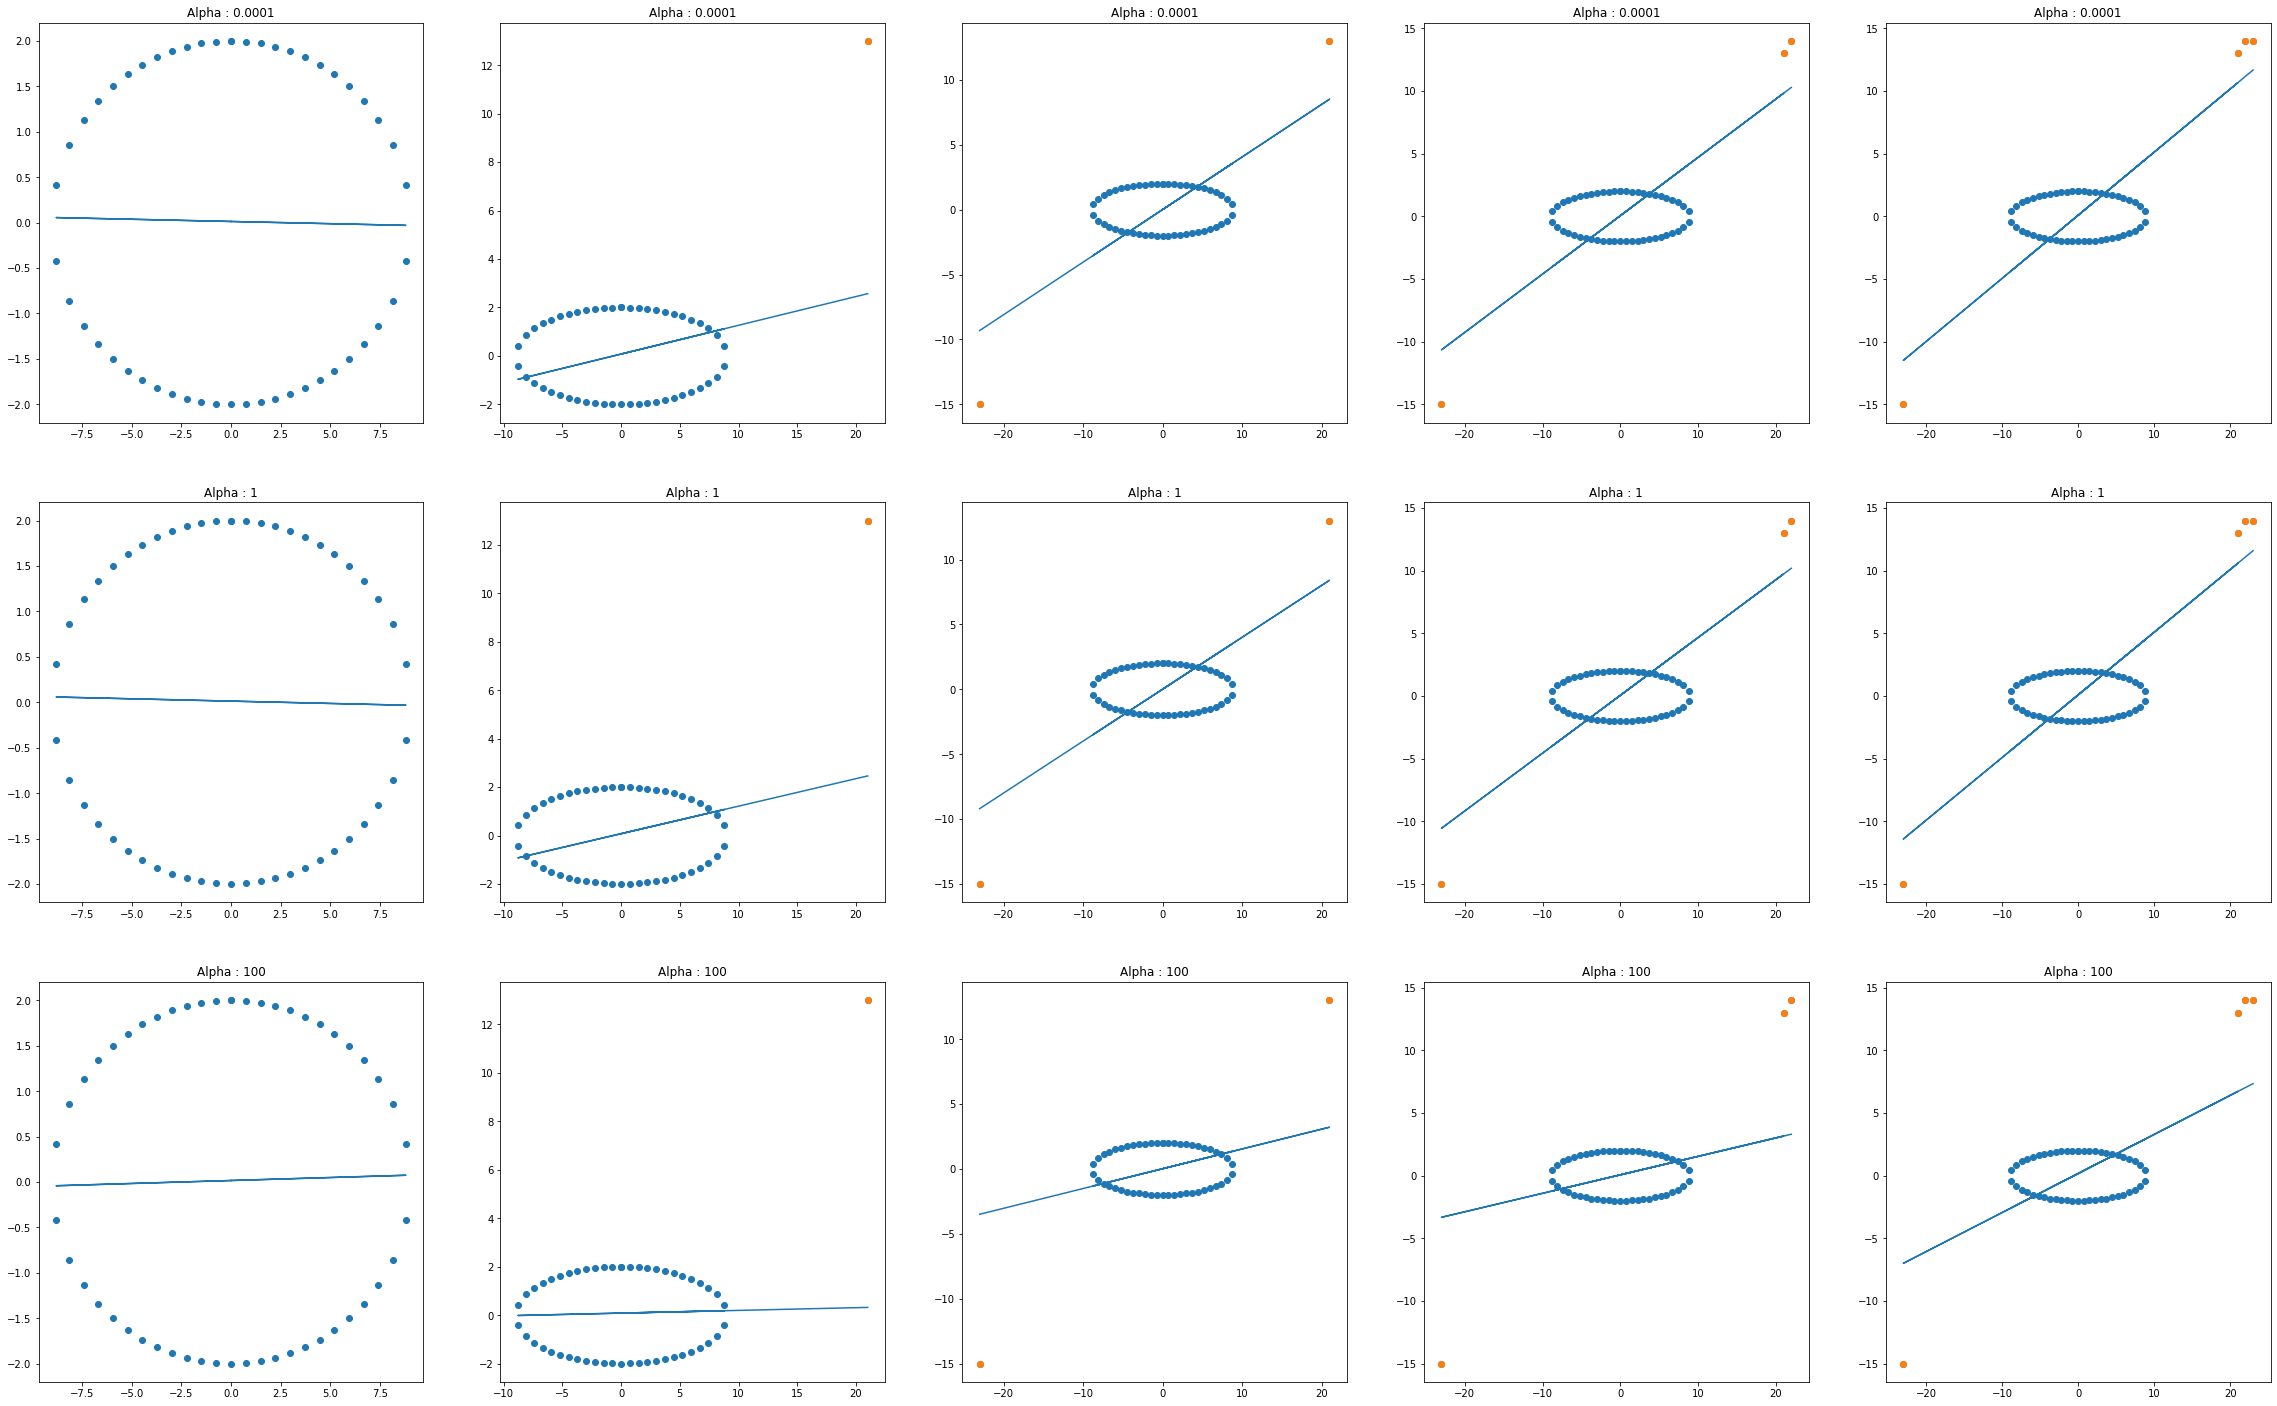

In [6]:
#setting alpha and outlier values
plt.figure(figsize=(40,25))
alpha=[0.0001, 1, 100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]
img = 0
#iterating through alpha
for i in range(len(alpha)):
  #setting x and y
  X= b * np.sin(phi)
  Y= a * np.cos(phi)
  #plt.figure(figsize=(25, 5))
  for j in range(len(outliers)):
    img += 1
    #plt.subplot(i+1, 5, j+1)
    #adding outlier points to ellipse
    X = np.append(X, outliers[j][0])
    Y = np.append(Y, outliers[j][1])

    #reshaping x and y
    X=X.reshape(-1,1)
    # Y=Y.reshape(-1,1)

    #create SGDRegressor model and fit with train data
    clf = SGDRegressor(alpha = alpha[i],eta0=0.001, learning_rate='constant',random_state=0)
    clf.fit(X, Y)
    #predict y values using model
    y_pred = clf.predict(X)
    
    #scatter plot between x and y
    plt.subplot(3,5,img).scatter(X, Y)
    plt.scatter(X[51:], Y[51:])

    #getting minimum and maximum values from y_pred
    # min_l = np.min(y_pred)
    # max_l = np.max(y_pred)

    #calculate points using formula
    #points=np.array([[np.sqrt(abs(1-(np.min(y_pred)**2 / b**2)*(a**2))), np.min(y_pred)], [np.sqrt(abs(1-(np.max(y_pred)**2 / b**2)*(a**2))), np.max(y_pred)]])


    #plot the calculated points
    #plt.subplot(3,5,img).plot(points[:,0], points[:,1])
    line(clf.intercept_, clf.coef_, X)
    plt.title(f'Alpha : {alpha[i]}')
plt.show()